# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Цель лабораторной работы:

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:


    1) Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
    
    2) Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        a) обработку пропусков в данных;
        b) кодирование категориальных признаков;
        c) масштабирование данных.


### Импорт библиотек

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

### Смотрим на датасет

In [90]:
data = pd.read_csv('./travel insurance.csv')

In [91]:
print('Строк:       {}'.format(data.shape[0]))
print('Столбцов:    {}'.format(data.shape[1]))

Строк:       63326
Столбцов:    11


In [92]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [93]:
data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

### Заполнение отсутствующих полей

In [94]:
filled_data = data

In [95]:
# Замена отсутствующих данных на "Unknown"
filled_data = filled_data.fillna('U')

In [96]:
filled_data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

### Удаление строк с отсутствующими значениями

In [97]:
del_data = data.dropna()

In [98]:
del_data.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [99]:
print('Строк до удаления:          {}'.format(data.shape[0]))
print('Строк после удаления:       {}'.format(del_data.shape[0]))

Строк до удаления:          63326
Строк после удаления:       18219


# 2) Кодирование категориальных признаков

#### Подход №1 - Найти и заменить

In [100]:
filled_data.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [101]:
obj_data = filled_data.select_dtypes(include=['object'])

In [102]:
filled_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,U,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,U,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,U,41


In [103]:
filled_data["Gender"].value_counts()

U    45107
M     9347
F     8872
Name: Gender, dtype: int64

In [104]:
cleanup_nums = {"Gender":     {"F": 0, "M": 1, "U": 2}}

filled_data = filled_data.replace(cleanup_nums)

In [105]:
filled_data["Gender"].value_counts()

2    45107
1     9347
0     8872
Name: Gender, dtype: int64

#### Подход №2 - Кодирование метки

In [106]:
filled_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,2,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,2,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,2,41


In [107]:
filled_data["Agency Type"].value_counts()

Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

In [108]:
le = LabelEncoder()
AT_le = le.fit_transform(filled_data['Agency Type'])


In [109]:
AT_le

array([1, 1, 1, ..., 0, 0, 0])

In [110]:
np.unique(AT_le)

array([0, 1])

In [111]:
AT_le.size

63326

In [112]:
filled_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,2,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,2,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,2,41


In [113]:
filled_data['Agency Type'] = AT_le
filled_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,2,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,2,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,2,41


# 3) Масштабирование данных

In [114]:
filled_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,2,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,2,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,2,41


/Users/ivan/Documents/ТМО/NIR/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

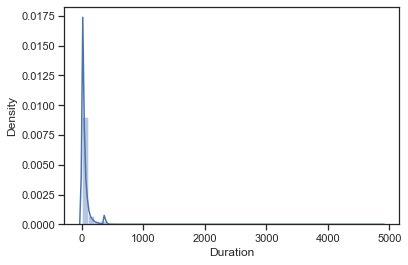

In [115]:
sns.distplot(filled_data['Duration'])

In [116]:
scl = MinMaxScaler()
scl_data = scl.fit_transform(filled_data[['Duration']])
filled_data['Duration'] = scl_data

/Users/ivan/Documents/ТМО/NIR/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

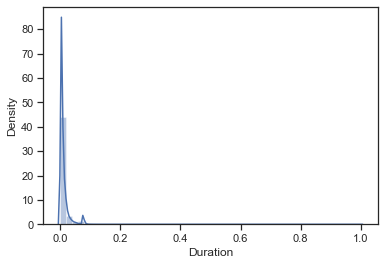

In [117]:
sns.distplot(filled_data['Duration'])